In [1]:
import os
import os.path as op
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline
import seaborn as sns
sns.set_theme(style="darkgrid", color_codes=True)
sns.set(font_scale=1.35, style="ticks") #set styling preferences
import statsmodels.api as sm
from scipy import stats
import math
from math import pi
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from scipy.spatial.distance import cdist
from scipy.cluster.vq import kmeans2,vq, whiten

In [2]:
#SFbaseline2018 = pd.read_csv("C:/Shared-Work/Data/CleanData/ASIM_BEAM_Merged/PersonTrip_SF_Baseline_2018/ASim_BEAM_PersonTrip_SF_Baseline_2018_updated.csv")
#sf_2018_base = pd.read_csv("C:/Shared-Work/Data/CleanData/ASIM_BEAM_Merged/PersonTrip_SF_Baseline_2018/sf_2018_base.csv")
#SF_RH_Fleet_2018 = pd.read_csv("C:/Shared-Work/Data/CleanData/ASIM_BEAM_Merged/PersonTrip_SF_RHFleetsz0125_2018/ASim_BEAM_Merged_SF_RHFleetsz0125_2018.csv")
#SF_RH_Fleet_175_2018 = pd.read_csv("C:/Shared-Work/Data/CleanData/ASIM_BEAM_Merged/PersonTrip_SF_RHFleetsz175_2018/ASim_BEAM_Merged_SF_RHFleetsz175_2018.csv")

In [3]:
#SF_TransitFreq05_2018 = pd.read_csv("C:/Shared-Work/Data/CleanData/sf_2018_tr_fr_1p5.csv")
#SF_TransitFreq2_2018 = pd.read_csv("C:/Shared-Work/Data/CleanData/sf_2018_tr_fr_2.csv")

In [4]:
# Show all columns and rows
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [5]:
%%time
sfbase = pd.read_csv('C:/Shared-Work/Data/CleanData/ASIM_BEAM_Merged/PersonTrip_SF_Baseline_2018/sf_2018_base.csv')

CPU times: total: 1min 2s
Wall time: 1min 2s


In [6]:
sfbase.tail()

,IDMerged,tripIndex,BlockGroupEnd,BlockGroupStart,actEndTime,actEndType,actStartTime,actStartType,cost_BEAM,distance_bike,distance_mode_choice,distance_privateCar,distance_ridehail,distance_total,distance_transit,distance_walking,duration_in_privateCar,duration_in_ridehail,duration_in_transit,duration_on_bike,duration_total,duration_walking,fuelBiodiesel,fuelDiesel,fuelElectricity,fuelFood,fuelGasoline,fuel_marginal,fuel_not_Food,vehicleIds_estimate,mode_choice_actual_BEAM,mode_choice_planned_BEAM,numPassengers,parkingType,reason,replanning_status,ride_hail_pooled,scenario,transit_bus,transit_cable_car,transit_rail,transit_subway,transit_tram,vehicleIds,year,duration_door_to_door,waitTime,actPurpose,mode_choice_actual_5,trip_id,person_id,household_id,tour_id,primary_purpose_x,trip_num,outbound,trip_count,purpose,destination_x,origin_x,destination_logsum_x,depart,trip_mode_AS_trips,logsum_trip_mode_AS_trips,tour_type,tour_type_count,tour_type_num,tour_num,tour_count,tour_category,number_of_participants,destination_y,origin_y,household_id_x,tdd,start,end,duration,composition,destination_logsum_y,tour_mode_AS_tours,logsum_tours_mode_AS_tours,atwork_subtour_frequency,parent_tour_id,stop_frequency,primary_purpose_y,earning,worker,student,hispanic.1,person_sex,PNUM,sex,household_id_y,hours,MAR,person_age,edu,school_zone_id,race_id,race,work_at_home,age,work_zone_id,p_hispanic,relate,hispanic,TAZ_x,ptype,pemploy,pstudent,home_x,home_y,age_16_to_19,age_16_p,adult,male,female,has_non_worker,has_retiree,has_preschool_kid,has_driving_kid,has_school_kid,has_full_time,has_part_time,has_university,student_is_employed,nonstudent_to_school,is_student,is_gradeschool,is_highschool,is_university,school_segment,is_worker,home_taz,value_of_time,school_taz,distance_to_school,roundtrip_auto_time_to_school,workplace_taz,workplace_location_logsum,distance_to_work,workplace_in_cbd,work_taz_area_type,roundtrip_auto_time_to_work,work_auto_savings,work_auto_savings_ratio,free_parking_at_work,cdap_activity,travel_active,under16_not_at_school,has_preschool_kid_at_home,has_school_kid_at_home,mandatory_tour_frequency,work_and_school_and_worker,work_and_school_and_student,num_mand,num_work_tours,num_joint_tours,non_mandatory_tour_frequency,num_non_mand,num_escort_tours,num_eatout_tours,num_shop_tours,num_maint_tours,num_discr_tours,num_social_tours,num_non_escort_tours,gt55,seniors,VEHICL,lcm_county_id,hh_children,block_id,gt2,hispanic_head,age_of_head,race_of_head,tenure_mover,hh_size,sf_detached,tenure,hh_cars,income,hh_age_of_head,serialno,num_workers,hh_race_of_head,hh_income,recent_mover,hh_workers,hispanic_status_of_head,hh_seniors,hhsize,hh_type,TAZ_y,HHT,sample_rate,chunk_id,income_in_thousands,income_segment,median_value_of_time,hh_value_of_time,num_non_workers,num_drivers,num_adults,num_children,num_young_children,num_children_5_to_15,num_children_16_to_17,num_college_age,num_young_adults,non_family,family,home_is_urban,home_is_rural,auto_ownership,hh_work_auto_savings_ratio,num_under16_not_at_school,num_travel_active,num_travel_active_adults,num_travel_active_preschoolers,num_travel_active_children,num_travel_active_non_preschoolers,participates_in_jtf_model,joint_tour_frequency,num_hh_joint_tours
2529274,7399485,2.427031e+09,6.085509e+10,6.085509e+10,26388.0,escort,26727.0,escort,0.000000,0.0,6813.937,6813.937,0.0,6813.937,0.0,0.000,339.0,0.0,0.0,0.0,339.0,0.0,0.0,0.0,0.0,0.000,0.000000e+00,0.000000e+00,0.000000e+00,"body-7399485,teleportationSharedVehicle-2-7399...",hov3_teleportation,hov3_teleportation,NaN,NaN,NaN,0,0,baseline,0,0,0,0,0,NaN,2018,339.0,0.0,escort_to_escort,car,2.427031e+09,7399485.0,2894969.0,303378894.0,escort,1.0,False,2.0,escort,456.0,427.0,16.217209,7.0,SHARED3PAY,0.937019,escort,1.0,1.0,1.0,1.0,non_mandatory,1.0,427.0,445.0,2894969.0,37.0,7.0,7.0,0.0,NaN,13.162595,SHARED3FREE,-1.285878,NaN,NaN,0out_1in,escort,3000.0,0.0,0.0,0.0,male,3.0,1.0,2894969.0,35.0,5.0,20 to 35,16.0,-1.0,1.0,white,0.0,23.0,-1.0,no,2.0,0.0,445.0,4.0,3.0

#### Pairplot

In [7]:
sfbase['distance_total_log'] = sfbase.loc[:,'distance_total'].apply(np.log)
sfbase['duration_door_to_door_log'] = sfbase.loc[:,'duration_door_to_door'].apply(np.log)
sfbase['waitTime_log'] = sfbase.loc[:,'waitTime'].apply(np.log)
sfbase['income_log'] = sfbase.loc[:,'income'].apply(np.log)

In [58]:
%%time
# Create an array with the colors you want to use
#colors = ['#33BBEE', '#0077BB', '#EE7733', '#CC3311'] vibrant
#colors = ["#376ec9", "#1FE9AF", "#FDAC34", "#D83706"]
# Set your custom color palette
#sns.set_palette(sns.color_palette(colors))
plotDf_In1 = sfbase.reset_index()[['duration_door_to_door_log', 'income_log', 'waitTime_log', 'fuel_marginal', 'mode_choice_actual_5']] #'actEndTime','actStartTime', 'income','cost_BEAM', 
replacements = {'duration_door_to_door_log': 'Door-to-door Time'}
ren = plotDf_In1.rename(columns=replacements)   
#dict1 = {'HIC': 'High Income', 'UMIC': 'Upper-Middle Income', 'LMIC': 'Lower-Middle Income', 'LIC': 'Low Income'}
#ren['ModeChoice_Actual'] = ren.mode_choice_actual_BEAM.map(dict1)
pg = sns.pairplot(ren, hue='mode_choice_actual_5', plot_kws={'alpha':0.0015}, palette = 'turbo') 
a = pg.map(sns.regplot, lowess=True, scatter_kws={'alpha':0.03})
     
for ii, col in enumerate(pg.axes):
    for jj, ax in enumerate(col):
        ax.set_ylim(ren[pg.y_vars[ii]].quantile(0.05), ren[pg.y_vars[ii]].quantile(0.95))
        ax.set_xlim(ren[pg.x_vars[jj]].quantile(0.05), ren[pg.x_vars[jj]].quantile(0.95))
        
for ax in a.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 45)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')       

KeyboardInterrupt: 

In [ ]:
%%time
colors = ["#D1406D"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
plotDf_In1 = sfbase.reset_index()[['duration_door_to_door_log', 'income_log', 'waitTime_log', 'fuel_marginal']] #'actEndTime','actStartTime', 'income','cost_BEAM', 
replacements = {'duration_door_to_door_log': 'Door-to-door Time'}
ren = plotDf_In1.rename(columns=replacements)   
#dict1 = {'HIC': 'High Income', 'UMIC': 'Upper-Middle Income', 'LMIC': 'Lower-Middle Income', 'LIC': 'Low Income'}
#ren['ModeChoice_Actual'] = ren.mode_choice_actual_BEAM.map(dict1)
pg = sns.pairplot(ren, plot_kws={'alpha':0.0015}) 
a = pg.map(sns.regplot, lowess=True, scatter_kws={'alpha':0.03})
     
for ii, col in enumerate(pg.axes):
    for jj, ax in enumerate(col):
        ax.set_ylim(ren[pg.y_vars[ii]].quantile(0.05), ren[pg.y_vars[ii]].quantile(0.95))
        ax.set_xlim(ren[pg.x_vars[jj]].quantile(0.05), ren[pg.x_vars[jj]].quantile(0.95))
        
for ax in a.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 45)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')       

C:\Users\nazanin\.conda\envs\geo_env\lib\site-packages\numpy\core\function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
C:\Users\nazanin\.conda\envs\geo_env\lib\site-packages\numpy\core\function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start


#### Bar Plots

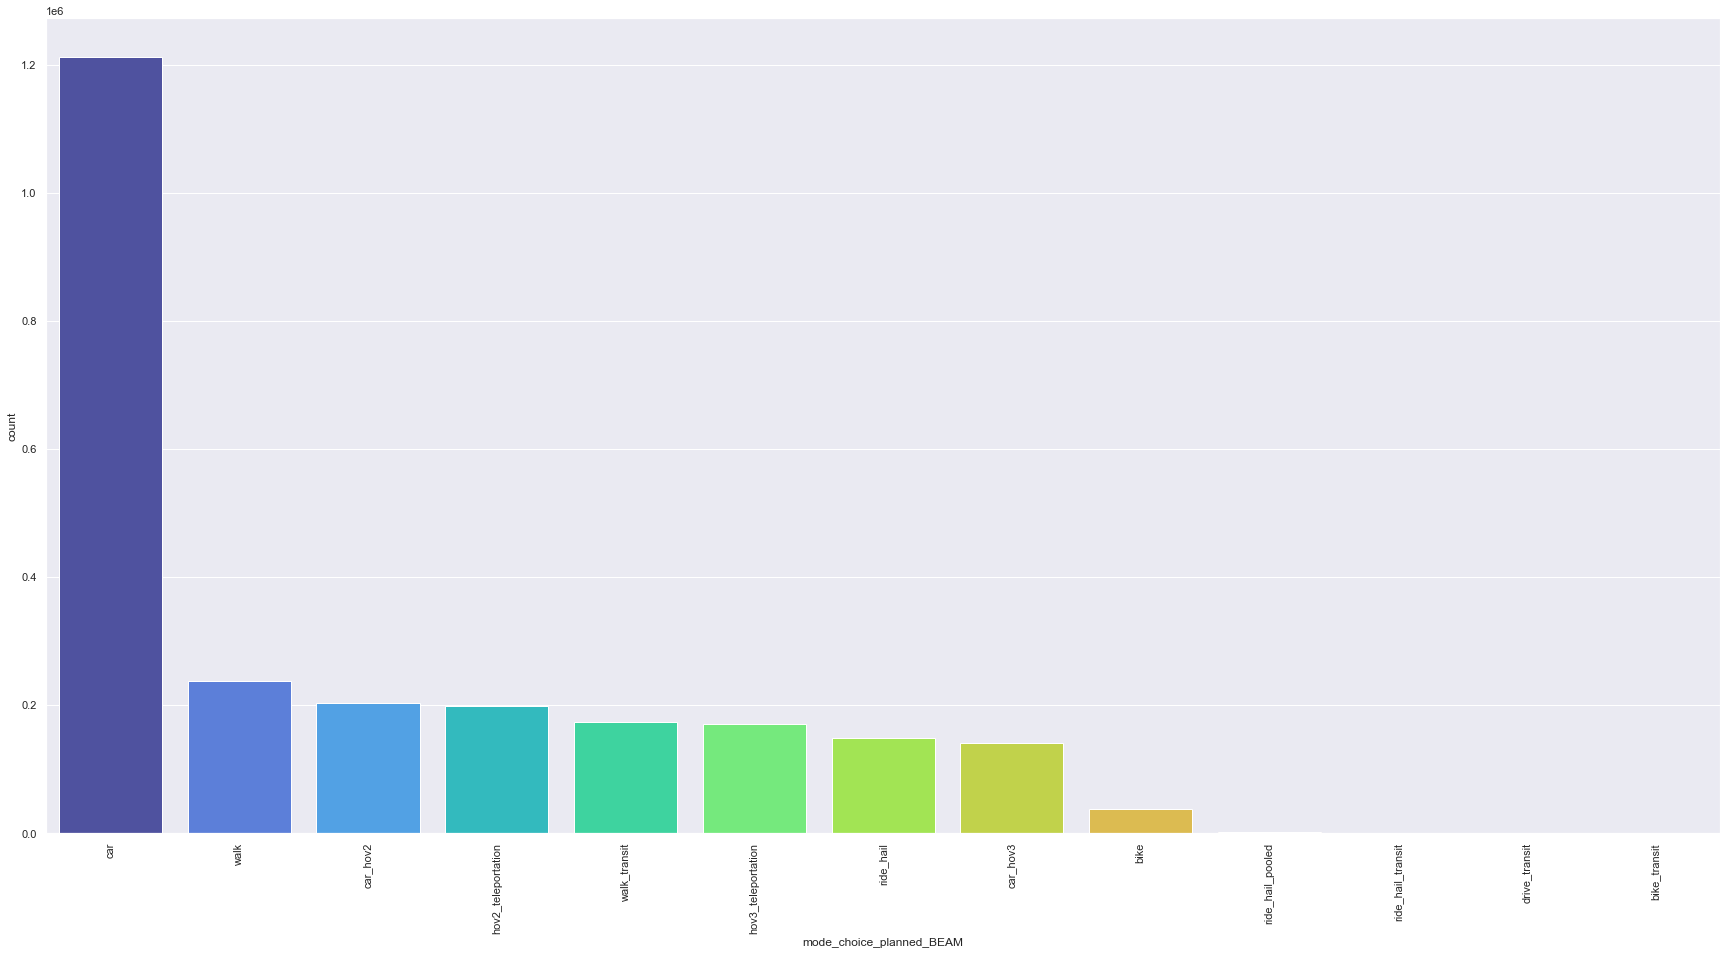

In [64]:
sns.set(rc={'figure.figsize':(30,15)})
sns.countplot(x = 'mode_choice_planned_BEAM',
              data = sfbase,
              order = sfbase['mode_choice_planned_BEAM'].value_counts().index, palette = "turbo")
plt.xticks(rotation=90)
plt.show()

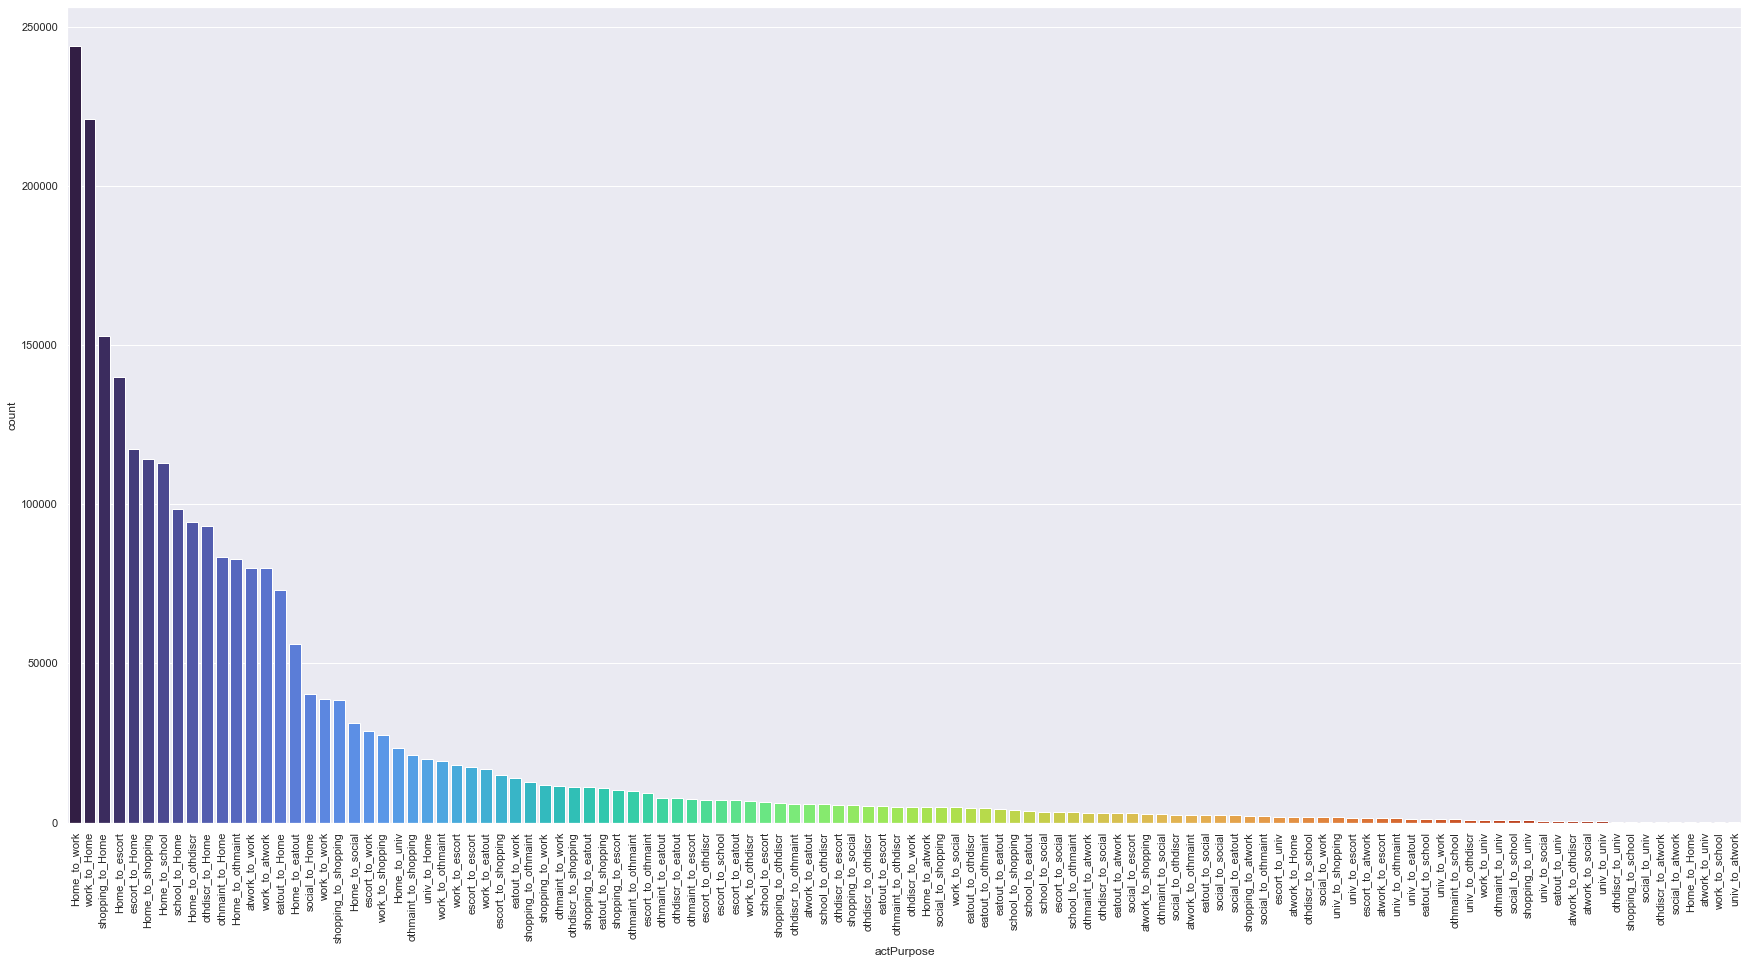

In [62]:
sns.set(rc={'figure.figsize':(30,15)})
sns.countplot(x = 'actPurpose',
              data = sfbase,
              order = sfbase['actPurpose'].value_counts().index, palette = "turbo")
plt.xticks(rotation=90)
plt.show()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Tex

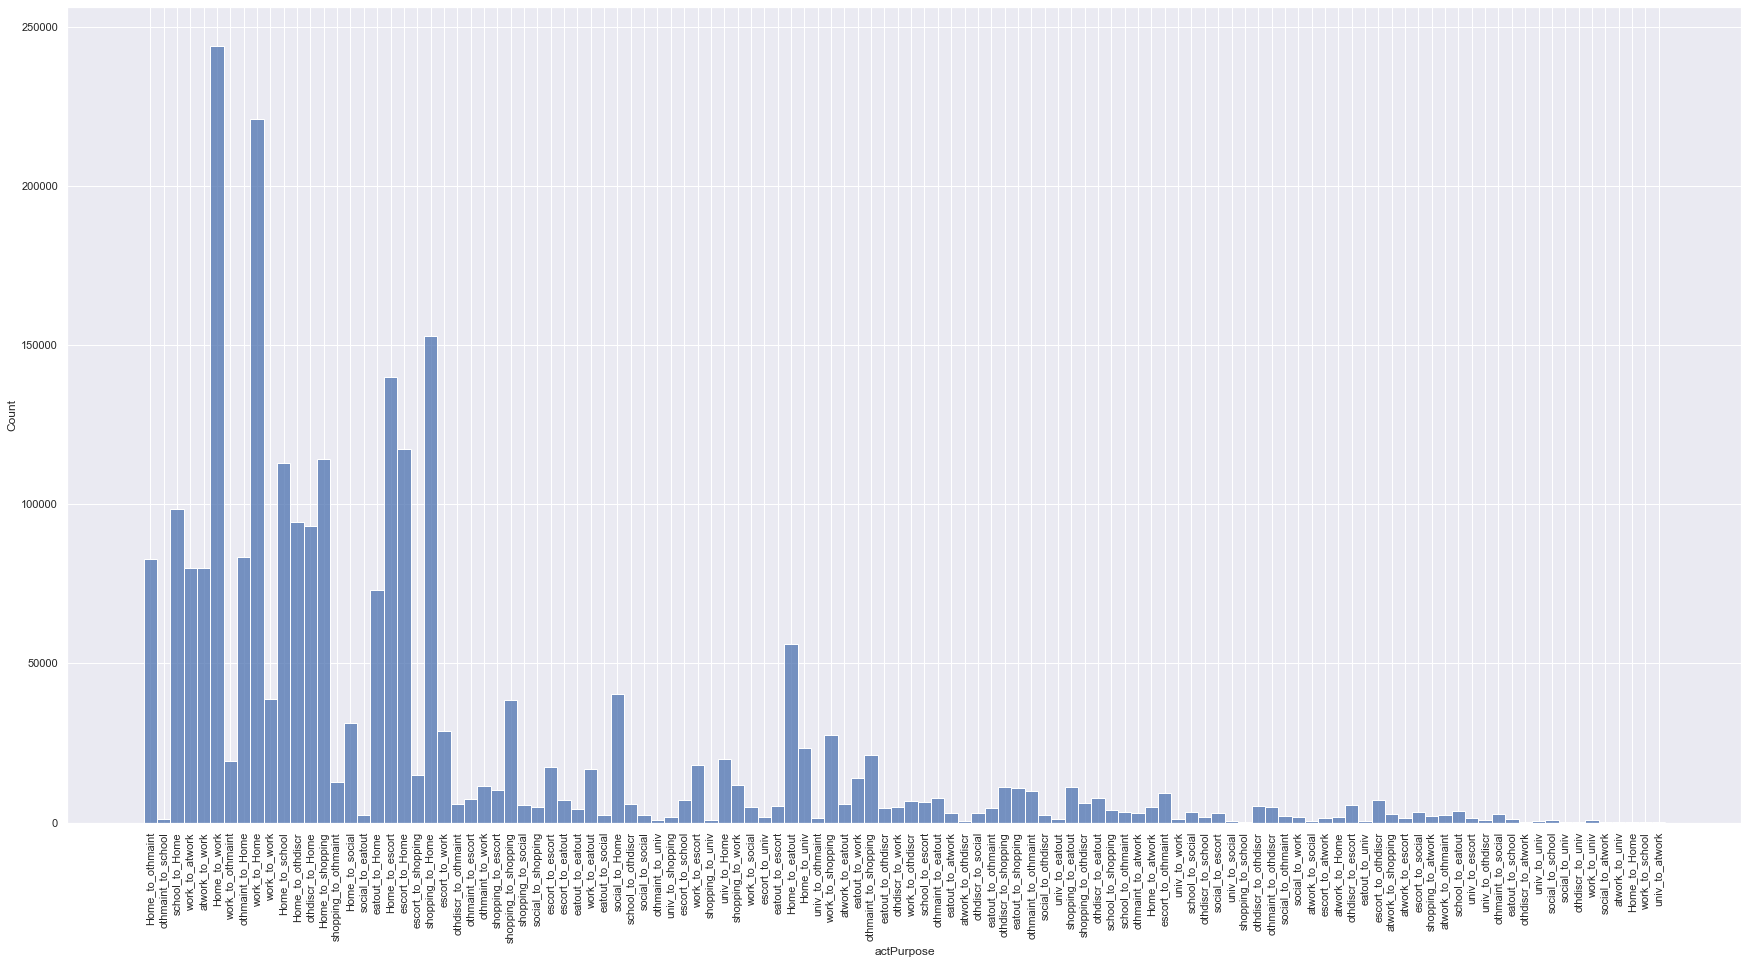

In [59]:
ax = sns.histplot(data=sfbase, x="actPurpose")
plt.xticks(rotation=90)

In [20]:
sns.histplot(data=sfbase, x="mode_choice_actual_BEAM", hue="actPurpose", multiple="stack")

#### Box Plots

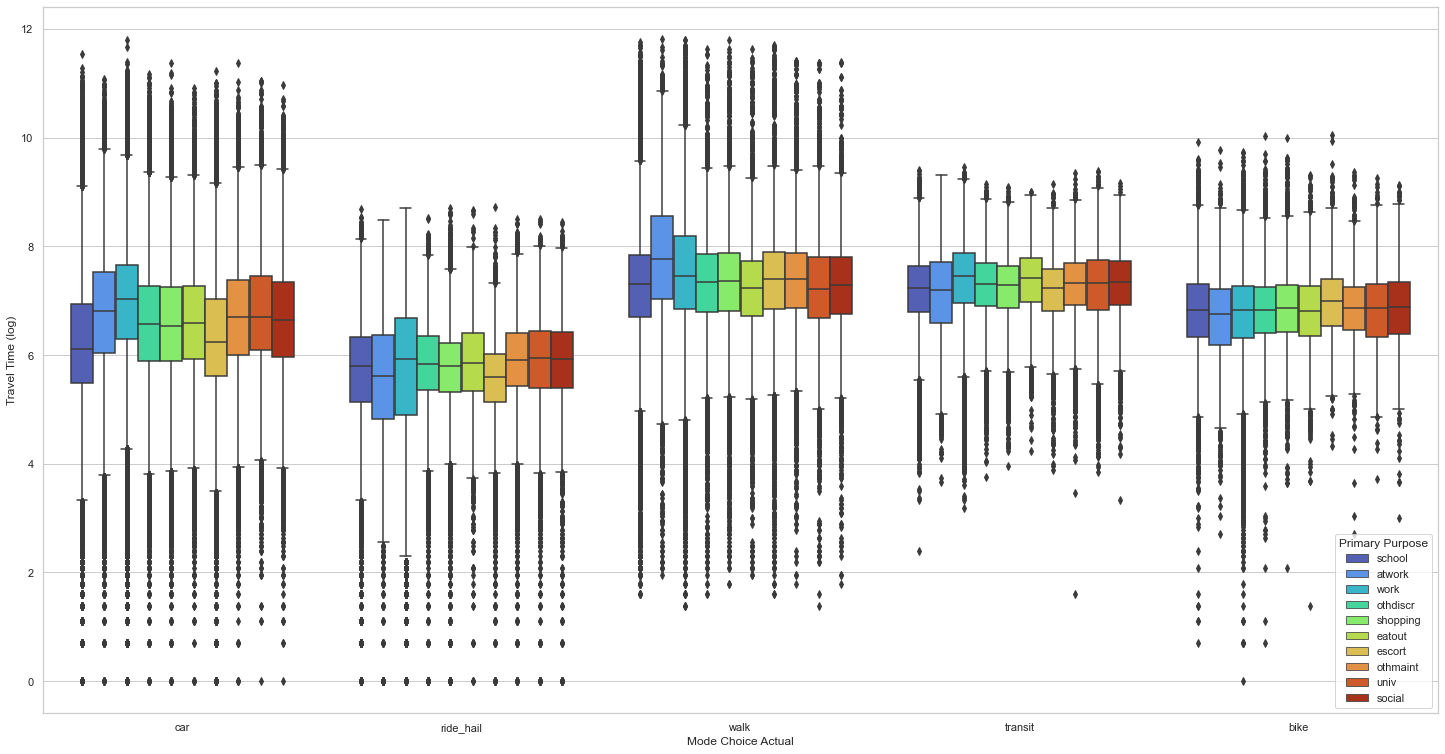

In [22]:
sfbase['travelTime_log'] = sfbase.loc[:,'duration_total'].apply(np.log)
sns.set(rc={'figure.figsize':(25,13)})
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="mode_choice_actual_5", y="travelTime_log", hue="primary_purpose_x",
                 data=sfbase, palette="turbo")
ax.set(xlabel='Mode Choice Actual', ylabel='Travel Time (log)')
#ax.set_xticklabels(['High Density','Low Density','Low Compactness','Connected Street Network','Disconnected Street Network'], rotation=45)
#handles, _ = ax.get_legend_handles_labels()   # Get the artists.
#ax.legend(handles, ["More Developed", "Less Developed", 'Least Developed'], loc="best") # Associate manually the artists to a label.
ax.legend(title='Primary Purpose')

In [19]:
#sns.catplot(x="mode_choice_actual_BEAM", y="travelTime_log", kind="box", data=sfbase, palette = "turbo")
#plt.xticks(rotation=90) 

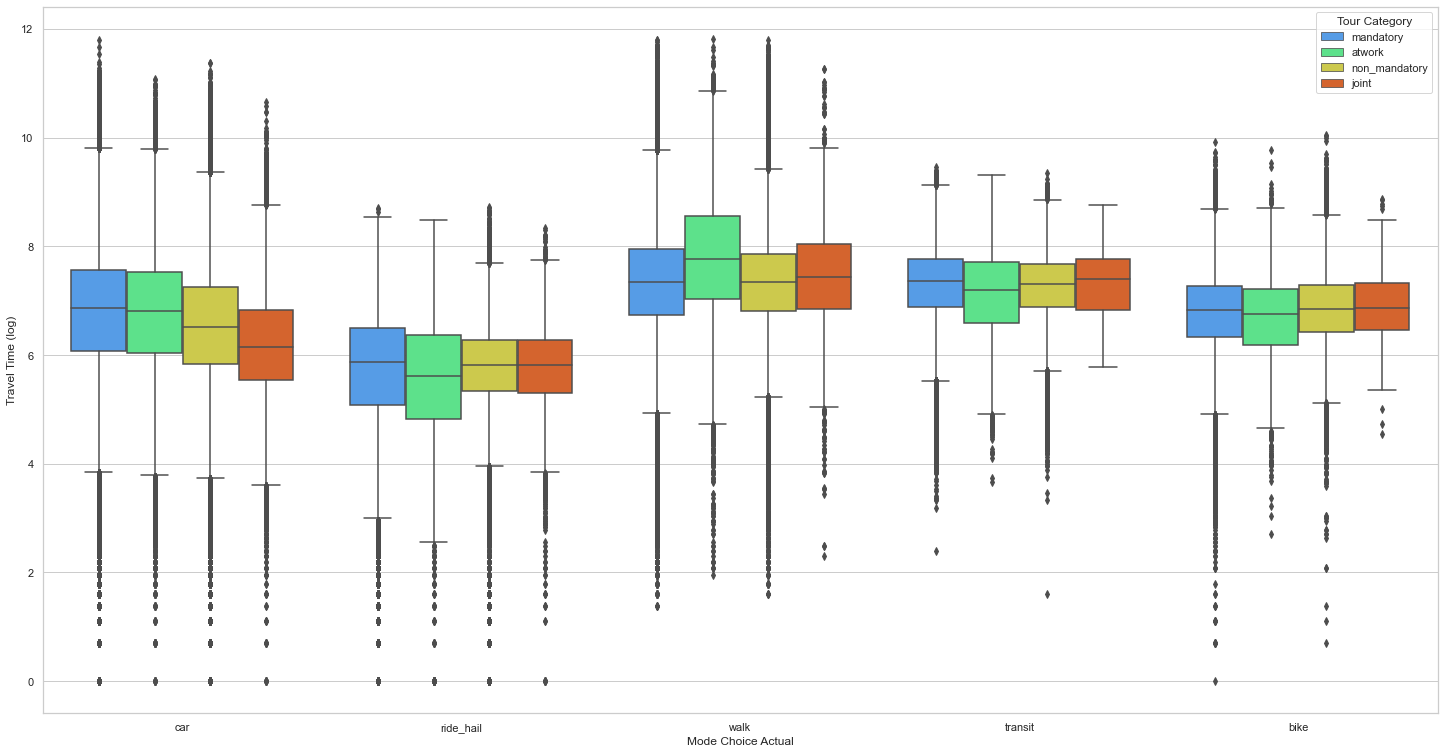

In [24]:
sfbase['travelTime_log'] = sfbase.loc[:,'duration_total'].apply(np.log)
sns.set(rc={'figure.figsize':(25,13)})
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="mode_choice_actual_5", y="travelTime_log", hue="tour_category",
                 data=sfbase, palette="turbo")
ax.set(xlabel='Mode Choice Actual', ylabel='Travel Time (log)')
#ax.set_xticklabels(['High Density','Low Density','Low Compactness','Connected Street Network','Disconnected Street Network'], rotation=45)
#handles, _ = ax.get_legend_handles_labels()   # Get the artists.
#ax.legend(handles, ["More Developed", "Less Developed", 'Least Developed'], loc="best") # Associate manually the artists to a label.
ax.legend(title='Tour Category')

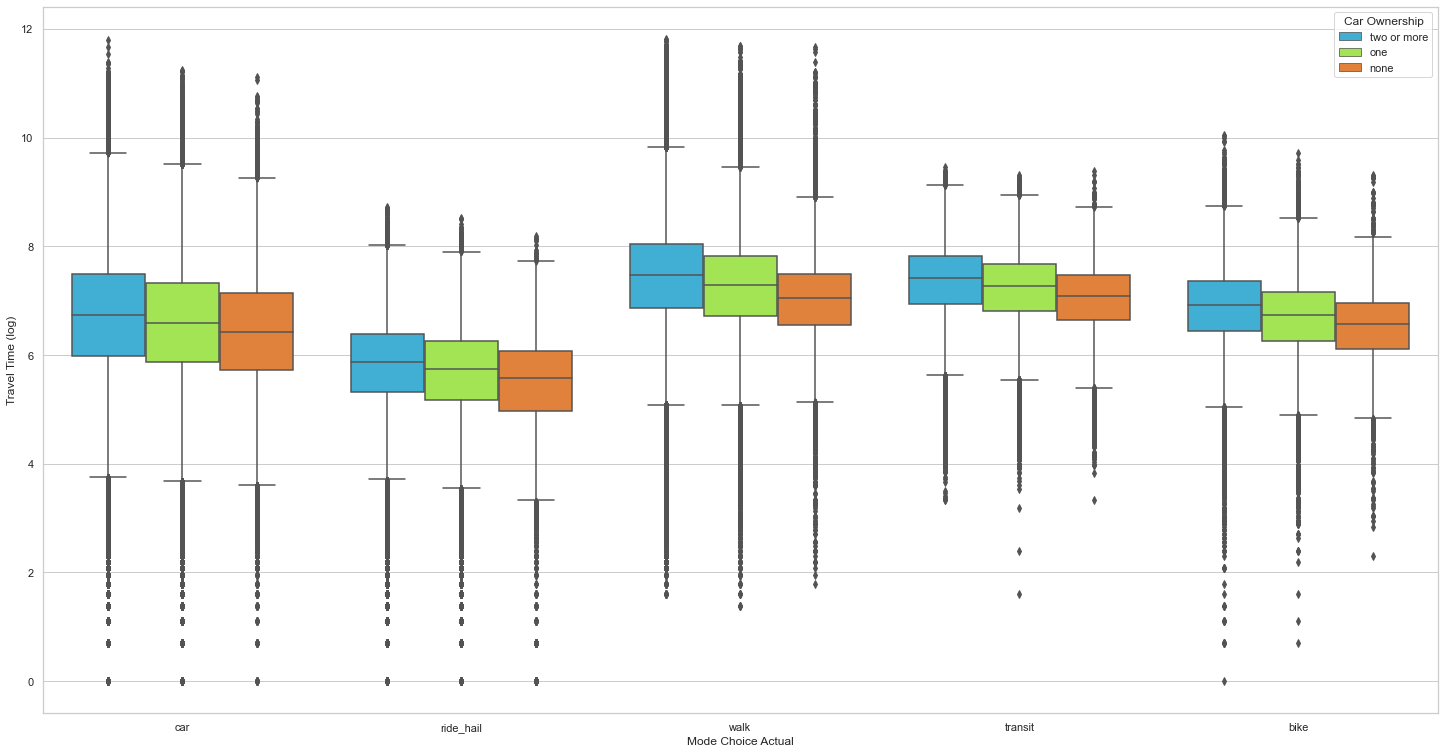

In [25]:
sfbase['travelTime_log'] = sfbase.loc[:,'duration_total'].apply(np.log)
sns.set(rc={'figure.figsize':(25,13)})
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="mode_choice_actual_5", y="travelTime_log", hue="hh_cars",
                 data=sfbase, palette="turbo")
ax.set(xlabel='Mode Choice Actual', ylabel='Travel Time (log)')
#ax.set_xticklabels(['High Density','Low Density','Low Compactness','Connected Street Network','Disconnected Street Network'], rotation=45)
#handles, _ = ax.get_legend_handles_labels()   # Get the artists.
#ax.legend(handles, ["More Developed", "Less Developed", 'Least Developed'], loc="best") # Associate manually the artists to a label.
ax.legend(title='Car Ownership')

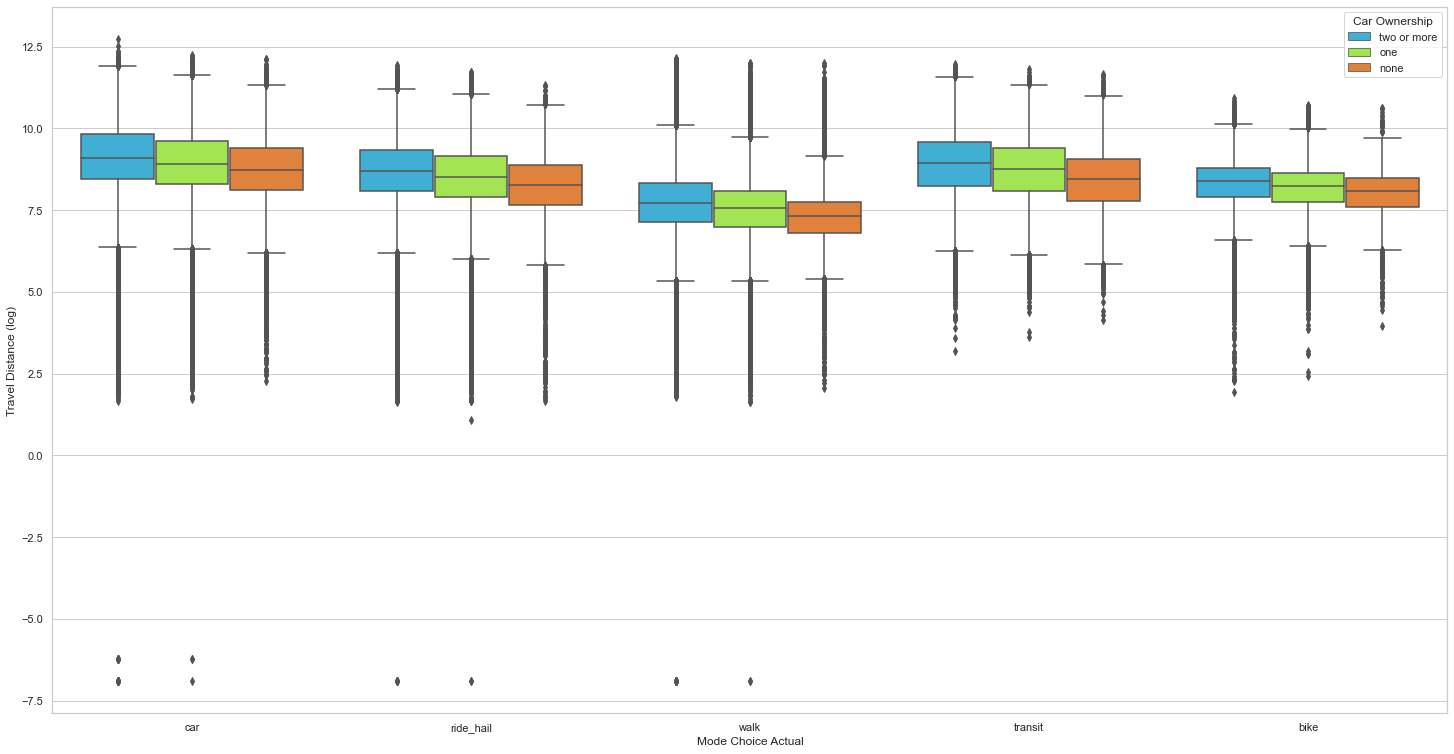

In [29]:
sfbase['travelDist_log'] = sfbase.loc[:,'distance_total'].apply(np.log)
sns.set(rc={'figure.figsize':(25,13)})
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="mode_choice_actual_5", y="travelDist_log", hue="hh_cars",
                 data=sfbase, palette="turbo")
ax.set(xlabel='Mode Choice Actual', ylabel='Travel Distance (log)')
#ax.set_xticklabels(['High Density','Low Density','Low Compactness','Connected Street Network','Disconnected Street Network'], rotation=45)
#handles, _ = ax.get_legend_handles_labels()   # Get the artists.
#ax.legend(handles, ["More Developed", "Less Developed", 'Least Developed'], loc="best") # Associate manually the artists to a label.
ax.legend(title='Car Ownership')

C:\Users\nazanin\.conda\envs\geo_env\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\nazanin\.conda\envs\geo_env\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\nazanin\.conda\envs\geo_env\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\nazanin\.conda\envs\geo_env\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\nazanin\.conda\envs\geo_env\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\nazanin\.conda\envs\geo_env\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b

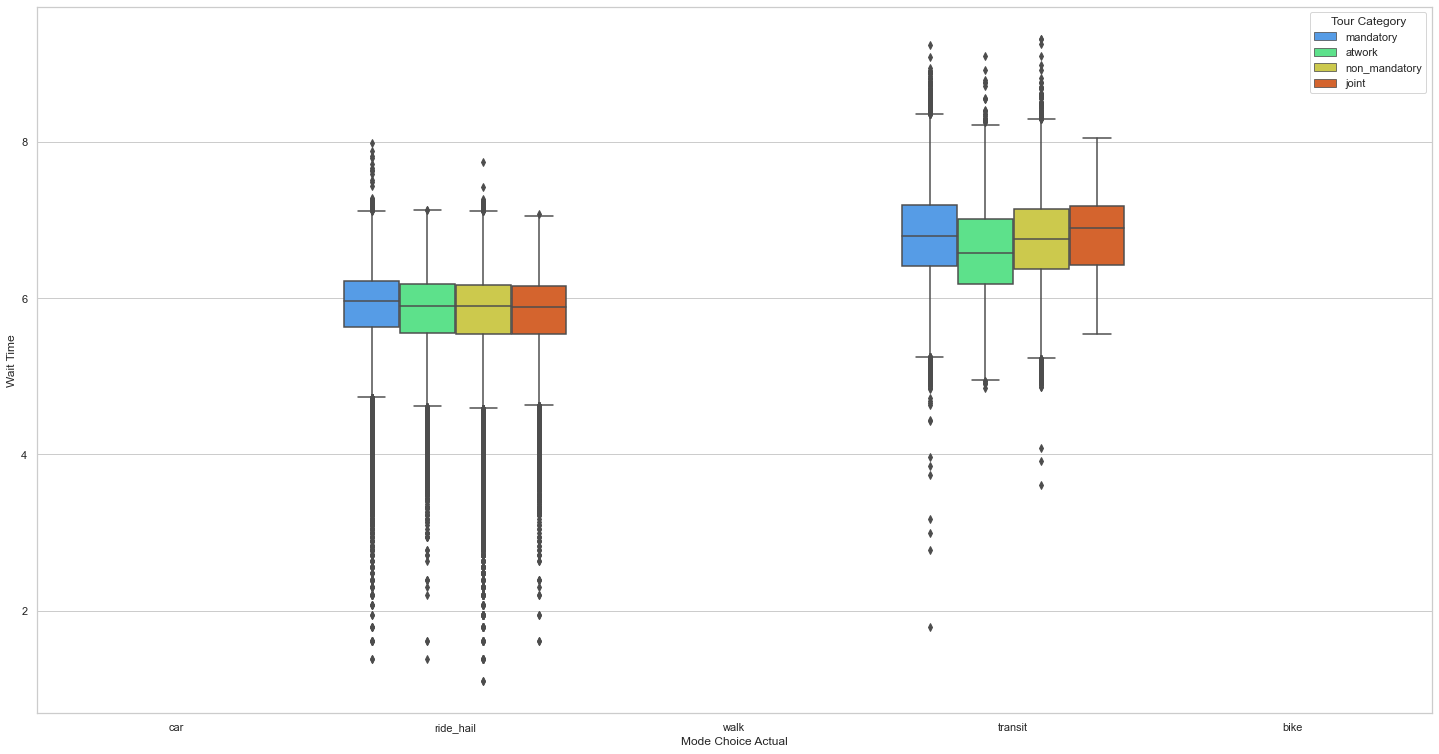

In [9]:
sfbase['waitTime_log'] = sfbase.loc[:,'waitTime'].apply(np.log) 
sns.set(rc={'figure.figsize':(25,13)})
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="mode_choice_actual_5", y="waitTime_log", hue="tour_category",
                 data=sfbase, palette="turbo")
ax.set(xlabel='Mode Choice Actual', ylabel='Wait Time')
#ax.set_xticklabels(['High Density','Low Density','Low Compactness','Connected Street Network','Disconnected Street Network'], rotation=45)
#handles, _ = ax.get_legend_handles_labels()   # Get the artists.
#ax.legend(handles, ["More Developed", "Less Developed", 'Least Developed'], loc="best") # Associate manually the artists to a label.
ax.legend(title='Tour Category')

C:\Users\nazanin\.conda\envs\geo_env\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\nazanin\.conda\envs\geo_env\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\nazanin\.conda\envs\geo_env\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\nazanin\.conda\envs\geo_env\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\nazanin\.conda\envs\geo_env\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\nazanin\.conda\envs\geo_env\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b

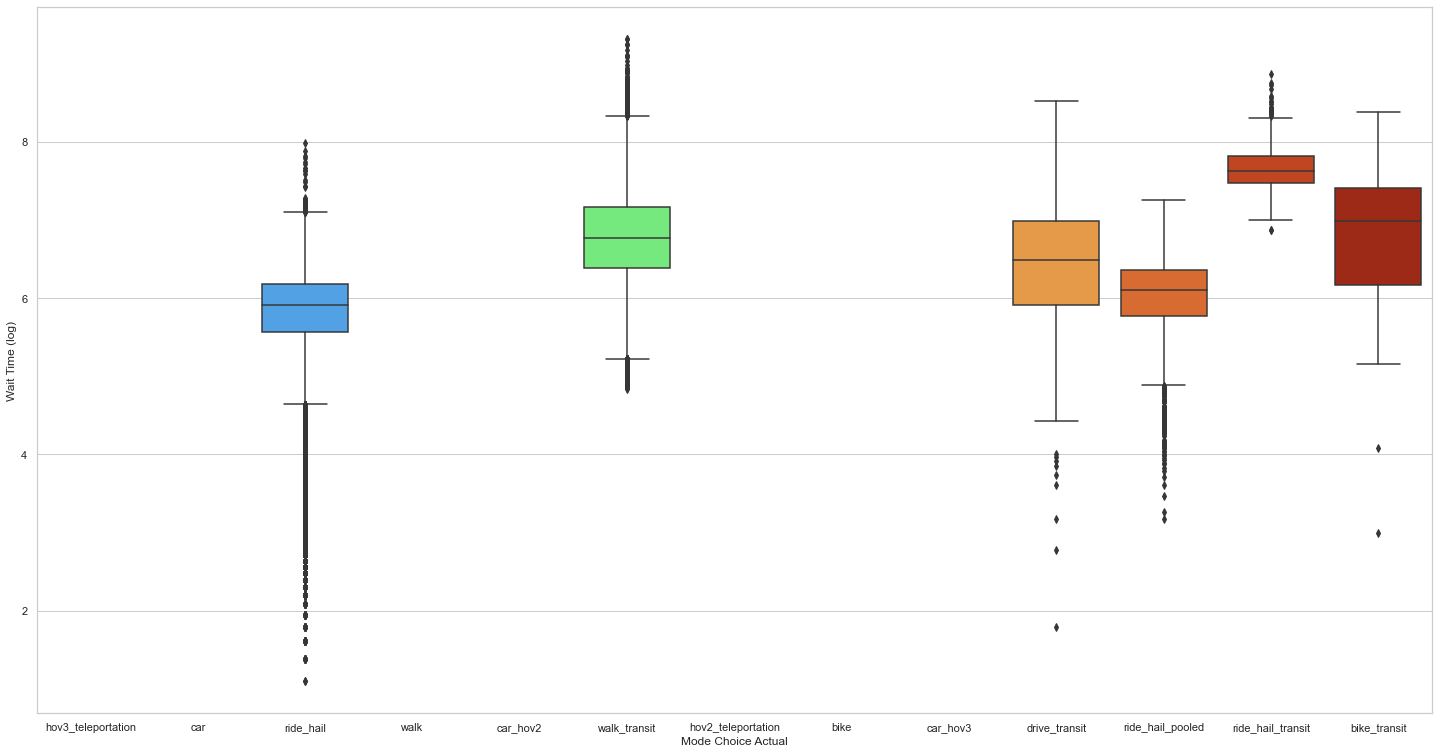

In [34]:
sfbase['waitTime_log'] = sfbase.loc[:,'waitTime'].apply(np.log)
sns.set(rc={'figure.figsize':(25,13)})
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="mode_choice_actual_BEAM", y="waitTime_log",
                 data=sfbase, palette="turbo")
ax.set(xlabel='Mode Choice Actual', ylabel='Wait Time (log)')
#ax.set_xticklabels(['High Density','Low Density','Low Compactness','Connected Street Network','Disconnected Street Network'], rotation=45)
handles, _ = ax.get_legend_handles_labels()   # Get the artists.
#ax.legend(handles, ["High Income", "Upper-Middle Income", 'Lower-Middle Income', 'Low Income'], loc="best") # Associate manually the artists to a label.

C:\Users\nazanin\.conda\envs\geo_env\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\nazanin\.conda\envs\geo_env\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


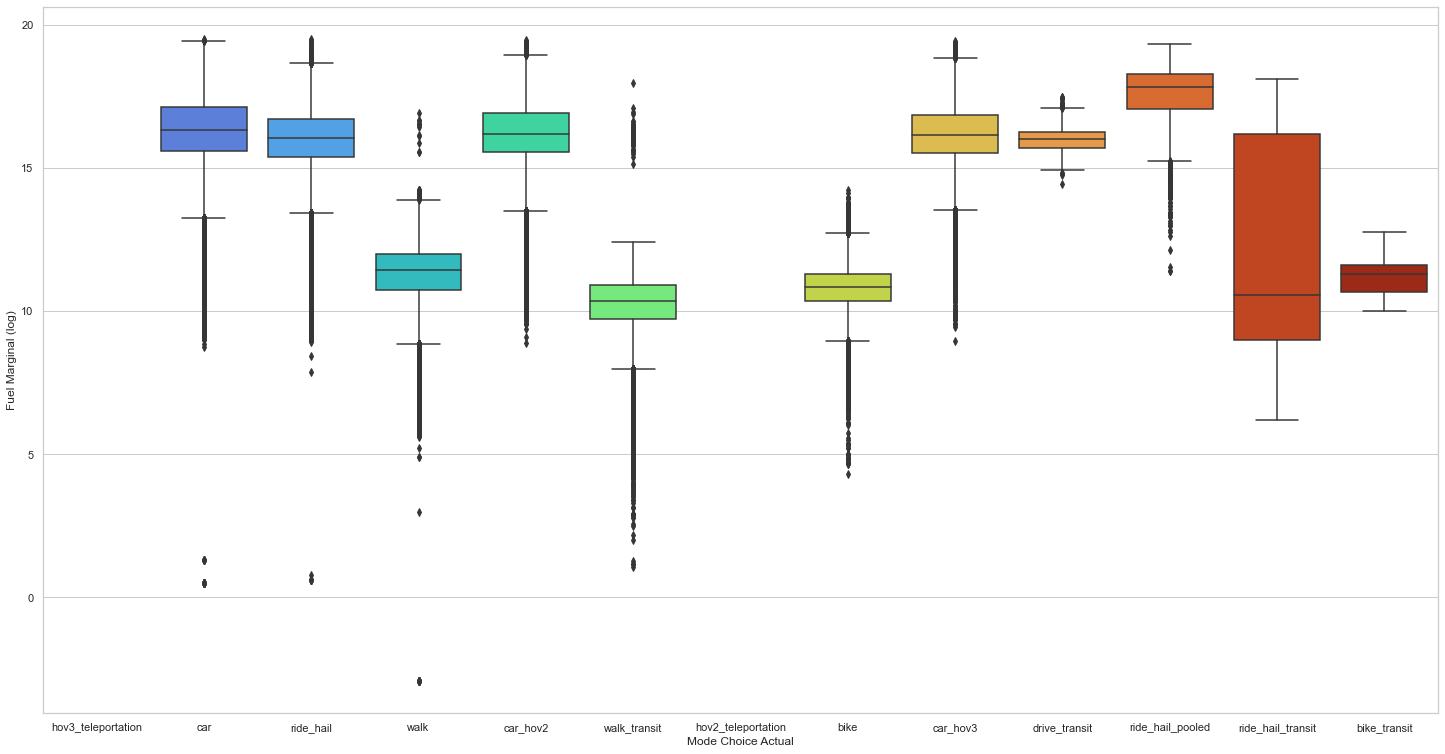

In [36]:
sfbase['fuel_log'] = sfbase.loc[:,'fuel_marginal'].apply(np.log)
sns.set(rc={'figure.figsize':(25,13)})
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="mode_choice_actual_BEAM", y="fuel_log",
                 data=sfbase, palette="turbo")
ax.set(xlabel='Mode Choice Actual', ylabel='Fuel Marginal (log)')
#ax.set_xticklabels(['High Density','Low Density','Low Compactness','Connected Street Network','Disconnected Street Network'], rotation=45)
handles, _ = ax.get_legend_handles_labels()   # Get the artists.
#ax.legend(handles, ["High Income", "Upper-Middle Income", 'Lower-Middle Income', 'Low Income'], loc="best") # Associate manually the artists to a label.

C:\Users\nazanin\.conda\envs\geo_env\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\nazanin\.conda\envs\geo_env\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\nazanin\.conda\envs\geo_env\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


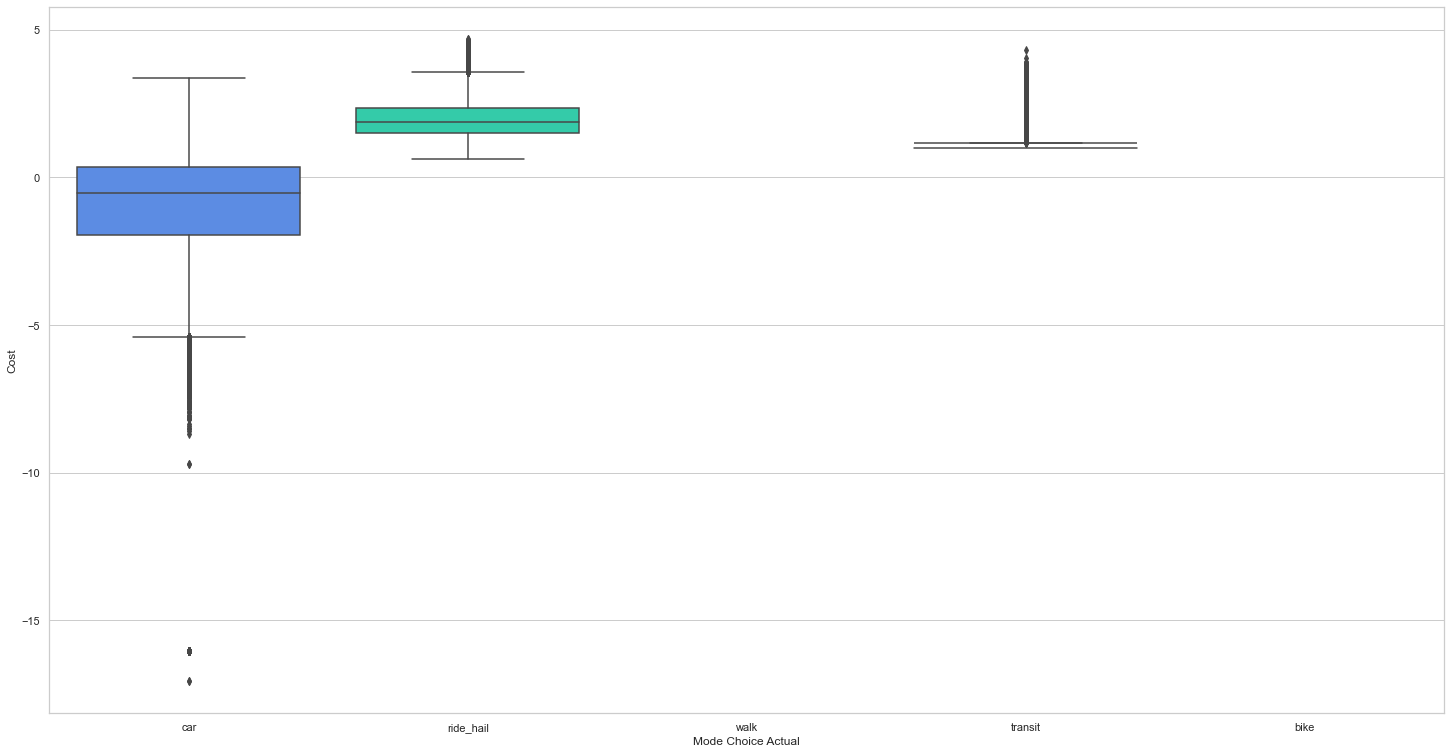

In [14]:
sfbase['cost_BEAM_log'] = sfbase.loc[:,'cost_BEAM'].apply(np.log)
sns.set(rc={'figure.figsize':(25,13)})
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="mode_choice_actual_5", y="cost_BEAM_log",
                 data=sfbase, palette="turbo")
ax.set(xlabel='Mode Choice Actual', ylabel='Cost')
#ax.set_xticklabels(['High Density','Low Density','Low Compactness','Connected Street Network','Disconnected Street Network'], rotation=45)
handles, _ = ax.get_legend_handles_labels()   # Get the artists.
#ax.legend(handles, ["High Income", "Upper-Middle Income", 'Lower-Middle Income', 'Low Income'], loc="best") # Associate manually the artists to a label.

C:\Users\nazanin\.conda\envs\geo_env\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\nazanin\.conda\envs\geo_env\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\nazanin\.conda\envs\geo_env\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\nazanin\.conda\envs\geo_env\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\nazanin\.conda\envs\geo_env\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\nazanin\.conda\envs\geo_env\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b

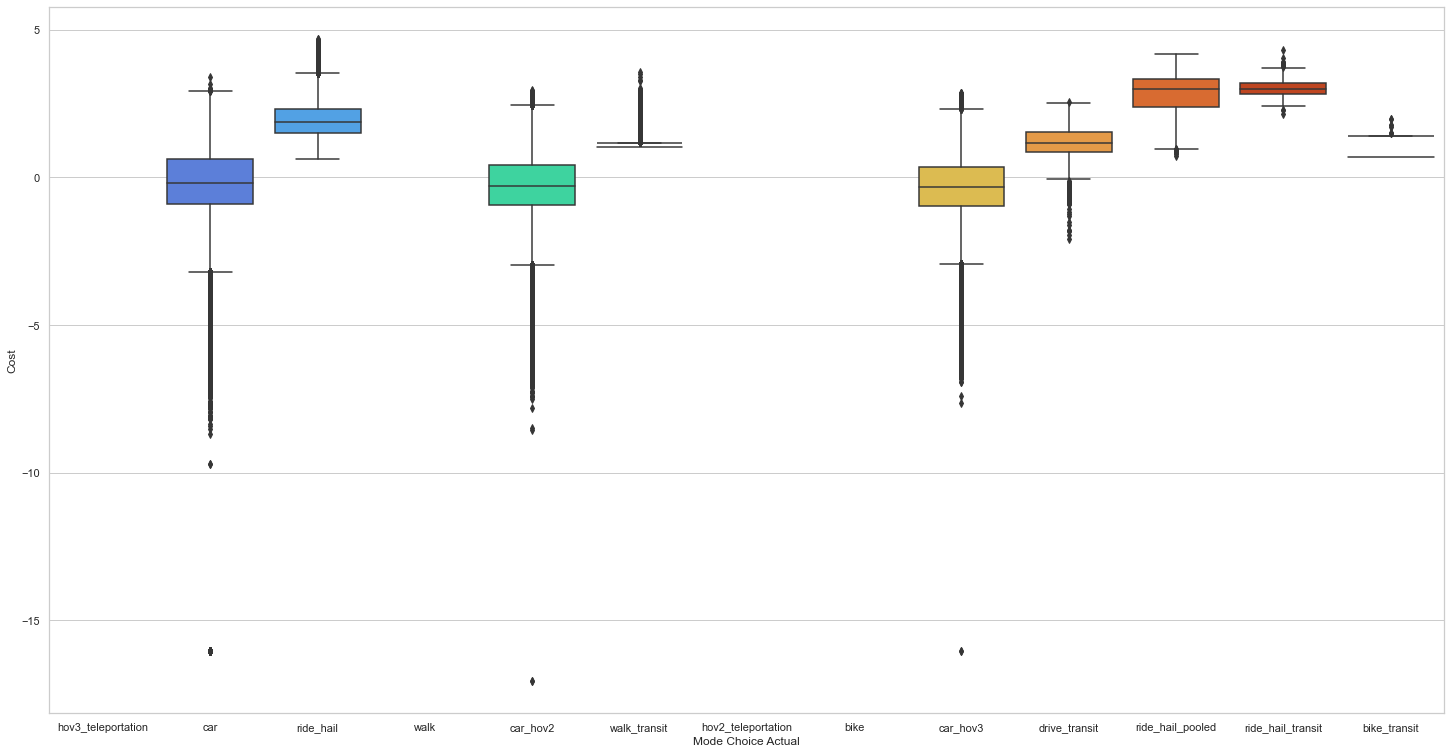

In [12]:
sfbase['cost_BEAM_log'] = sfbase.loc[:,'cost_BEAM'].apply(np.log)
sns.set(rc={'figure.figsize':(25,13)})
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="mode_choice_actual_BEAM", y="cost_BEAM_log",
                 data=sfbase, palette="turbo")
ax.set(xlabel='Mode Choice Actual', ylabel='Cost')
#ax.set_xticklabels(['High Density','Low Density','Low Compactness','Connected Street Network','Disconnected Street Network'], rotation=45)
handles, _ = ax.get_legend_handles_labels()   # Get the artists.
#ax.legend(handles, ["High Income", "Upper-Middle Income", 'Lower-Middle Income', 'Low Income'], loc="best") # Associate manually the artists to a label.

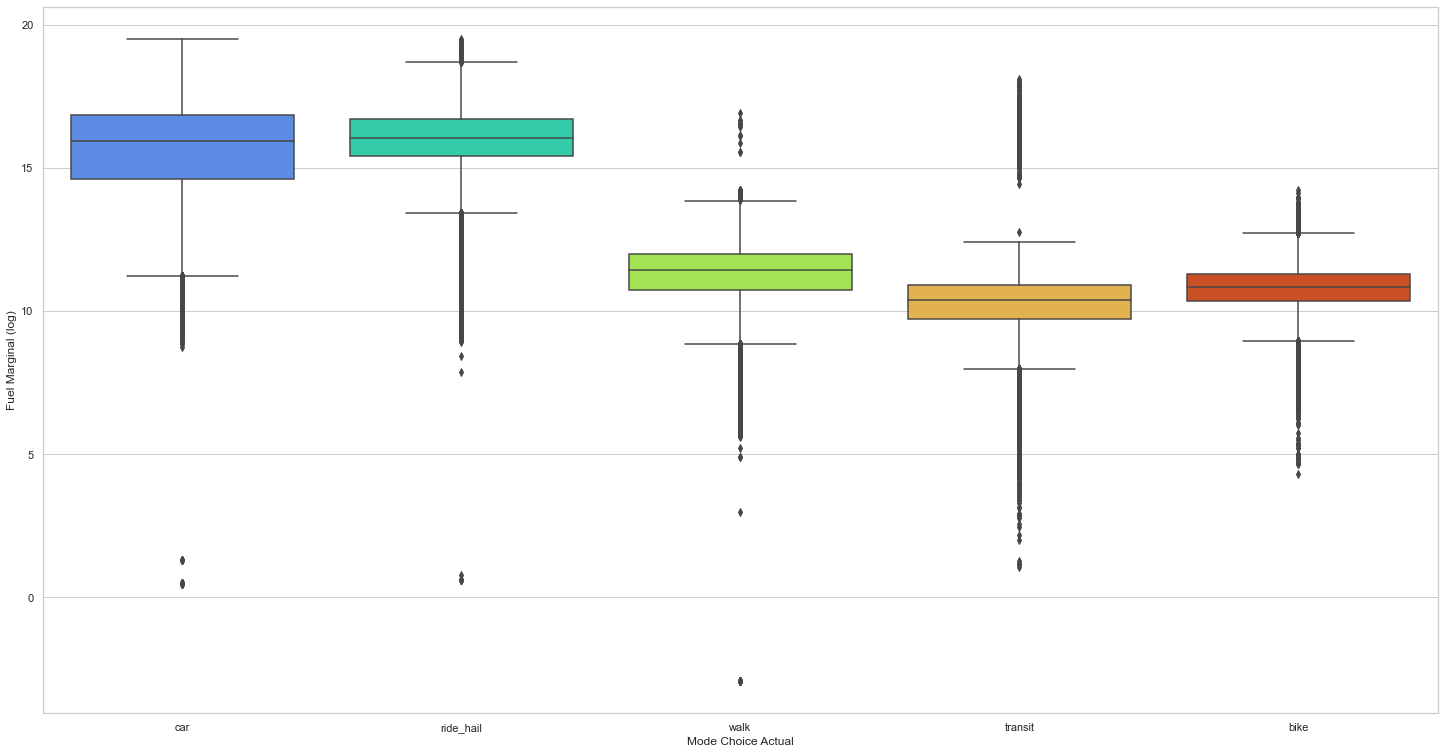

In [11]:
sfbase['fuel_log'] = sfbase.loc[:,'fuel_marginal'].apply(np.log)
sns.set(rc={'figure.figsize':(25,13)})
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="mode_choice_actual_5", y="fuel_log",
                 data=sfbase, palette="turbo")
ax.set(xlabel='Mode Choice Actual', ylabel='Fuel Marginal (log)')
#ax.set_xticklabels(['High Density','Low Density','Low Compactness','Connected Street Network','Disconnected Street Network'], rotation=45)
handles, _ = ax.get_legend_handles_labels()   # Get the artists.
#ax.legend(handles, ["High Income", "Upper-Middle Income", 'Lower-Middle Income', 'Low Income'], loc="best") # Associate manually the artists to a label.

C:\Users\nazanin\.conda\envs\geo_env\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\nazanin\.conda\envs\geo_env\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\nazanin\.conda\envs\geo_env\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\nazanin\.conda\envs\geo_env\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\nazanin\.conda\envs\geo_env\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\nazanin\.conda\envs\geo_env\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'hov3_teleportation'),
  Text(1, 0, 'car'),
  Text(2, 0, 'ride_hail'),
  Text(3, 0, 'walk'),
  Text(4, 0, 'car_hov2'),
  Text(5, 0, 'walk_transit'),
  Text(6, 0, 'hov2_teleportation'),
  Text(7, 0, 'bike'),
  Text(8, 0, 'car_hov3'),
  Text(9, 0, 'drive_transit'),
  Text(10, 0, 'ride_hail_pooled'),
  Text(11, 0, 'ride_hail_transit'),
  Text(12, 0, 'bike_transit')])

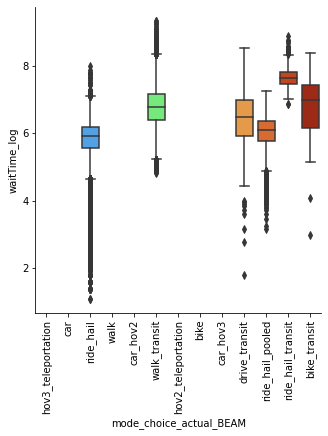

In [47]:
sfbase['waitTime_log'] = sfbase.loc[:,'waitTime'].apply(np.log)
sns.catplot(x="mode_choice_actual_BEAM", y="waitTime_log", kind="box", data=sfbase, palette = "turbo")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'hov3_teleportation'),
  Text(1, 0, 'car'),
  Text(2, 0, 'ride_hail'),
  Text(3, 0, 'walk'),
  Text(4, 0, 'car_hov2'),
  Text(5, 0, 'walk_transit'),
  Text(6, 0, 'hov2_teleportation'),
  Text(7, 0, 'bike'),
  Text(8, 0, 'car_hov3'),
  Text(9, 0, 'drive_transit'),
  Text(10, 0, 'ride_hail_pooled'),
  Text(11, 0, 'ride_hail_transit'),
  Text(12, 0, 'bike_transit')])

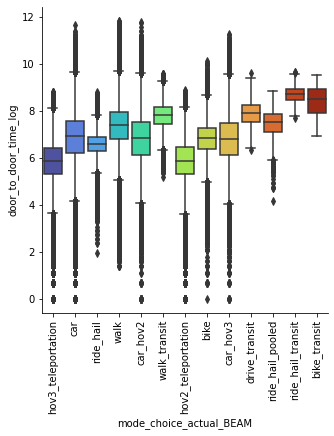

In [48]:
sfbase['door_to_door_time_log'] = sfbase.loc[:,'door_to_door_time'].apply(np.log)
sns.catplot(x="mode_choice_actual_BEAM", y="door_to_door_time_log", kind="box", data=sfbase, palette = "turbo")
plt.xticks(rotation=90)

In [33]:
#sns.catplot(x="mode_choice_actual_BEAM", y="travelTime_log", hue="actPurpose", kind="box", data=sfbase)
#plt.xticks(rotation=90)

#### Bar Plots

In [ ]:
sns.catplot(x="mode_choice_actual_BEAM", y="travelTime", hue="actPurpose", kind="bar", data=sfbase)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'hov3_teleportation'),
  Text(1, 0, 'car'),
  Text(2, 0, 'ride_hail'),
  Text(3, 0, 'walk'),
  Text(4, 0, 'car_hov2'),
  Text(5, 0, 'walk_transit'),
  Text(6, 0, 'hov2_teleportation'),
  Text(7, 0, 'bike'),
  Text(8, 0, 'car_hov3'),
  Text(9, 0, 'drive_transit'),
  Text(10, 0, 'ride_hail_pooled'),
  Text(11, 0, 'ride_hail_transit'),
  Text(12, 0, 'bike_transit')])

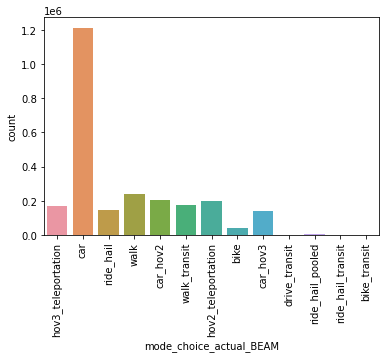

In [32]:
sns.countplot(x ='mode_choice_actual_BEAM', data = sfbase)
plt.xticks(rotation=90)

In [43]:
sfbase.door_to_door_time[sfbase.door_to_door_time < 0].count()

0

In [36]:
negative_door = sfbase[(sfbase.door_to_door_time<0)]

In [42]:
sfbase.waitTime[sfbase.waitTime < 0].count()

0

In [40]:
# Drop Negative Time columns
sfbase.drop(sfbase[sfbase.door_to_door_time < 0].index, inplace=True)

In [45]:
sfbase.cost_BEAM.sum()

3926450.162022764

In [ ]:
sfbase.distance_transit.sum()